# Set-Up

In [2]:
!pip install torch torchvision
!pip install easyocr
!pip install pdf2image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 36.0 MB/s eta 0:00:00


In [8]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.1/715.1 kB 7.4 MB/s eta 0:00:00


In [3]:
import easyocr
import PIL
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from pdf2image import convert_from_path
from PIL import Image
import cv2
from pathlib import Path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
print('dumb')

dumb


In [6]:
def convert_image_to_numpy(filename):

    if filename.split('.')[-1] == 'pdf':
        pil_image = convert_from_path(Path(f'{filename}'))[0]
        np_image = np.asarray(pil_image)
    else:
        pil_image = Image.open(f'{filename}')
        np_image = np.asarray(pil_image)

    return np_image

# YOLOv8-OBB (oriented object detection)


In [6]:
print('smart')

smart


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [9]:
from ultralytics import YOLO

dataset_yaml_path = '/content/drive/MyDrive/receipts_dataset/synthetic_yolo_dataset/receipts.yaml'
# prev. trained model
model_pt_path = '/content/drive/MyDrive/yolov8s-obb_checkpoint/best.pt'

# Load a pretrained model
model = YOLO(model_pt_path)

In [10]:
# Train the model

results = model.train(data=dataset_yaml_path, epochs=5, imgsz=1000)

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=/content/drive/MyDrive/yolov8s-obb_checkpoint/best.pt, data=/content/drive/MyDrive/receipts_dataset/synthetic_yolo_dataset/receipts.yaml, epochs=5, time=None, patience=50, batch=16, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 6.23M/6.23M [00:00<00:00, 117MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[1000] must be multiple of max stride 32, updating to [1024]


train: Scanning /content/drive/MyDrive/receipts_dataset/synthetic_yolo_dataset/labels/train... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [05:47<00:00,  2.59it/s]


train: New cache created: /content/drive/MyDrive/receipts_dataset/synthetic_yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/receipts_dataset/synthetic_yolo_dataset/labels/val... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:56<00:00,  1.75it/s]

val: New cache created: /content/drive/MyDrive/receipts_dataset/synthetic_yolo_dataset/labels/val.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      9.73G     0.6666     0.9061       1.89         18       1024: 100%|██████████| 57/57 [01:14<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.25s/it]

                   all        100        257          1      0.994      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5       9.8G     0.5979     0.5941       1.78         15       1024: 100%|██████████| 57/57 [00:59<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        100        257      0.994          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       9.8G     0.5765     0.5182      1.797         20       1024: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        100        257      0.995          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5       9.8G     0.5234     0.4665      1.719         15       1024: 100%|██████████| 57/57 [00:58<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        100        257          1          1      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      10.2G      0.473     0.4224      1.648         16       1024: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        100        257      0.999          1      0.995      0.966



5 epochs completed in 0.099 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 23.4MB
Optimizer stripped from runs/obb/train/weights/best.pt, 23.4MB

Validating runs/obb/train/weights/best.pt...
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-obb summary (fused): 187 layers, 11411958 parameters, 0 gradients, 29.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]


                   all        100        257      0.999          1      0.995      0.966
Speed: 0.7ms preprocess, 13.6ms inference, 0.0ms loss, 16.9ms postprocess per image
Results saved to runs/obb/train


In [11]:
# validate the model

metrics = model.val(data=dataset_yaml_path)

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-obb summary (fused): 187 layers, 11411958 parameters, 0 gradients, 29.4 GFLOPs


val: Scanning /content/drive/MyDrive/receipts_dataset/synthetic_yolo_dataset/labels/val.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


                   all        100        257      0.999          1      0.995      0.966
Speed: 0.7ms preprocess, 36.1ms inference, 0.0ms loss, 21.9ms postprocess per image
Results saved to runs/obb/train2


In [12]:
for k, v in metrics.results_dict.items():
  print(f'{k}: {v}')

metrics/precision(B): 0.999448387928926
metrics/recall(B): 1.0
metrics/mAP50(B): 0.995
metrics/mAP50-95(B): 0.9664683533036371
fitness: 0.9693215179732735


In [9]:
# I've downloaded best.pt weights and now can initialize model with them

from ultralytics import YOLO

model_pt_path = '/content/drive/MyDrive/yolov8s-obb_checkpoint/best_new.pt'
model = YOLO(model_pt_path)

In [10]:
import PIL
import matplotlib.pyplot as plt

# inference

test_image_path = '/content/drive/MyDrive/receipts_dataset/yolo_dataset/images/val/angles_3.jpg'

results = model(test_image_path)

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = PIL.Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results0.jpg')  # save image



image 1/1 /content/drive/MyDrive/receipts_dataset/yolo_dataset/images/val/angles_3.jpg: 416x1024 1490.4ms
Speed: 16.7ms preprocess, 1490.4ms inference, 24.1ms postprocess per image at shape (1, 3, 416, 1024)


# Crop Result Utils

In [11]:
# not cool

results[0].save_crop('cropped0.jpg')

WARNING ⚠️ OBB task do not support `save_crop`.


rect: ((1301.5, 588.4999389648438), (361.5216369628906, 1018.8619995117188), 9.036957740783691)
bounding box: [[1042 1063]
 [1203   57]
 [1560  113]
 [1400 1119]]
rect: ((1844.8116455078125, 493.02642822265625), (645.3068237304688, 496.8148498535156), 82.01668548583984)
bounding box: [[1554  208]
 [2045  139]
 [2135  778]
 [1643  847]]
rect: ((757.0316162109375, 506.8678894042969), (888.2572631835938, 365.40313720703125), 85.09172821044922)
bounding box: [[537  80]
 [901  48]
 [977 933]
 [613 965]]
rect: ((2447.5, 575.5), (1068.995849609375, 371.9811706542969), 85.8150863647461)
bounding box: [[2223   55]
 [2593   28]
 [2672 1095]
 [2301 1122]]


<ipython-input-31-082231e61adb>:28: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


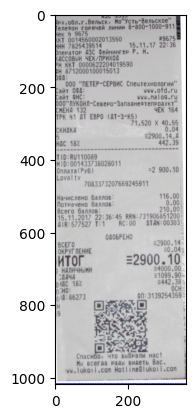

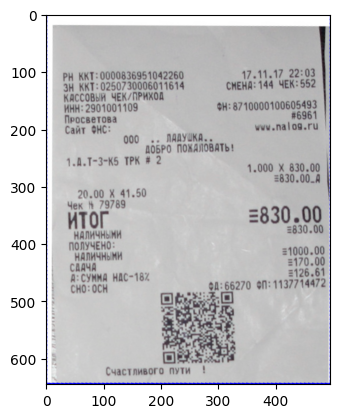

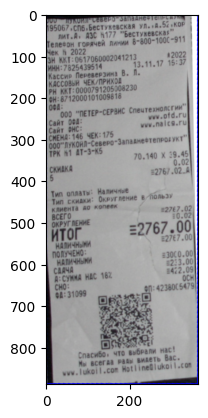

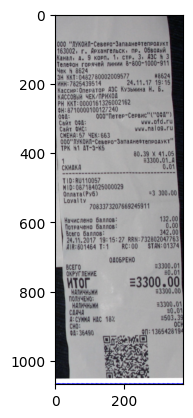

In [31]:
import math
import cv2
import numpy as np

# clip image by using inference results

# first point in xyxyxyxy format is bottom-left, cool
# other points go counter-clockwise

# x, y is the center point in xywhr format

def get_cropped_result_boxes(obb_results):
  for result in obb_results:

    image_cv = cv2.imread(result.path)
    cropped_images = []

    for box in result.obb.xyxyxyxy:

      cnt = box.cpu().numpy().astype(int)
      rect = cv2.minAreaRect(cnt)
      should_rotate_90 = rect[2] > 45
      print("rect: {}".format(rect))

      # the order of the box points: bottom left, top left, top right,
      # bottom right
      box = cv2.boxPoints(rect)
      box = np.int0(box)

      print("bounding box: {}".format(box))
      cv2.drawContours(image_cv, [box], 0, (0, 0, 255), 2)

      # get width and height of the detected rectangle
      width = int(rect[1][0])
      height = int(rect[1][1])

      src_pts = box.astype("float32")
      # coordinate of the points in box points after the rectangle has been
      # straightened
      dst_pts = np.array([[0, height-1],
                          [0, 0],
                          [width-1, 0],
                          [width-1, height-1]], dtype="float32")

      # the perspective transformation matrix
      M = cv2.getPerspectiveTransform(src_pts, dst_pts)

      # directly warp the rotated rectangle to get the straightened rectangle
      warped = cv2.warpPerspective(image_cv, M, (width, height))
      if should_rotate_90:
        warped = cv2.rotate(warped, cv2.ROTATE_90_CLOCKWISE)
      cropped_images.append(warped)

    for image in cropped_images:
      plt.figure()
      plt.imshow(image)

get_cropped_result_boxes(results)